In [1]:
import os
import math
import time
import tarfile
import shutil
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy import constants as cons
from astropy.table import Table, Column, vstack, join
import astropy.coordinates as coords
from astropy import units as u
from scipy import stats
import matplotlib.mlab as mlab
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
mpl.rc("font", family="serif", size=16, weight=2)
mpl.rc("axes", linewidth = 2.0)
mpl.rc("lines", linewidth = 1.0)
mpl.rc("xtick.major", pad = 5, width = 1,size=8)
mpl.rc("ytick.major", pad = 5, width = 1,size=8)
mpl.rc("xtick.minor", width = 1,size=4)
mpl.rc("ytick.minor", width = 1,size=4)
mpl.rc('text', usetex=False)
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

In [3]:
sedlist = ascii.read('../N109_clumps/TableGet/aaa.txt')

In [4]:
import matplotlib.ticker as mtick

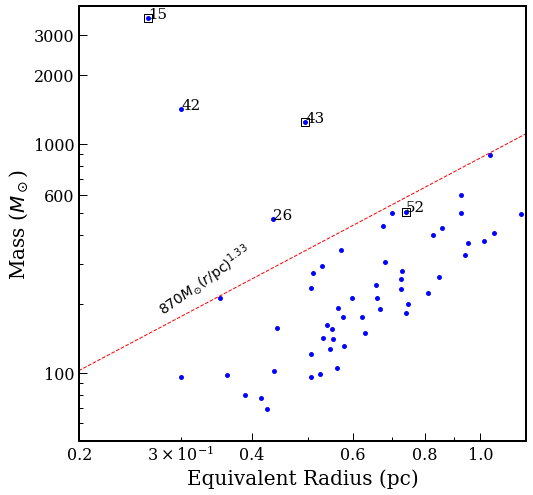

In [16]:
fig = plt.figure(1, figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(0.2,1.2)
ax1.set_ylim(50,4000)
# 设置y刻度：用文字来显示刻度
plt.yticks([100, 600, 1000, 2000, 3000])
plt.xticks([])
new_ticks = np.linspace(0.2, 1, 5)
plt.xticks(new_ticks)
ax1.xaxis.set_major_formatter(mtick.FormatStrFormatter("%.1f"))
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter("%d"))
x = np.logspace(np.log10(0.002), np.log10(30), 1000)
#x = np.linspace(0.2,1,1000)
y = 870.0*x**1.33
ax1.plot(x,y,'r--',zorder = 1, linewidth = 1)
for i in [14,42,51]:
    ax1.scatter(sedlist['r_pc'][i],sedlist['mass'][i], marker = 's',s=50,  
                    color = 'w',edgecolors="black")
"""for i in range(len(sedlist)):
    if (sedlist["Ma"][i]/sedlist['mass'][i])<=2:       
        ax1.scatter(sedlist['r_pc'][i],sedlist['mass'][i], marker = '.',s=60,  
                    color = 'blue')
    else:
        ax1.scatter(sedlist['r_pc'][i],sedlist['mass'][i], marker = '.',s=60, 
                    color = 'red')  
""" 
for i in range(len(sedlist)):      
    ax1.scatter(sedlist['r_pc'][i],sedlist['mass'][i], marker = '.',s=60,  
                    color = 'blue')
#ax1.errorbar(sedlist['r_pc'], sedlist['mass'], yerr=sedlist['error_mass'],fmt='.b',ecolor='b')
ax1.set_xlabel(r'Equivalent Radius (pc)',fontsize=20)
ax1.set_ylabel('Mass ($M_\odot$)',fontsize=20)
ax1.text(0.27, 180, '$870 M_{\odot}(r / \mathrm{pc})^{1.33}$', size = 14, rotation = 35)
for i in range(len(sedlist)):
    if i+1==52:
        ax1.annotate(i+1,xy = (sedlist['r_pc'][i],sedlist['mass'][i]),size=15)      
    if sedlist['mass'][i]/(870*sedlist['r_pc'][i]**1.33) > 1:
        ax1.annotate(i+1,xy = (sedlist['r_pc'][i],sedlist['mass'][i]),size=15)
        
fig.savefig('relationMR.eps', papertype='a2',
                bbox_inches='tight')
fig.savefig('relationMR.pdf', papertype='a2',
                bbox_inches='tight')

In [6]:
a=[]
for i in range(len(sedlist["Nh2f"])):
    if sedlist["Nh2f"][i]>7:
        a.append(i)

In [7]:
sedlist = sedlist[a]

In [8]:
aList = []
for i in range(len(sedlist)):
    if sedlist['mass'][i]/(870*sedlist['r_pc'][i]**1.33) > 1:
        aList.append(i)

In [9]:
aList

[14, 25, 41, 42]

In [10]:
min(sedlist['r_pc'])

0.263

In [11]:
max(sedlist['r_pc'])

1.238

In [12]:
min(sedlist['mass'])

69.0

In [13]:
max(sedlist['mass'])

3558.0

In [14]:
sedlist['r_pc']

<Column name='r_pc' dtype='float64' unit='pc' length=56>
0.547
0.361
0.506
 0.53
0.856
0.511
0.661
0.729
0.597
0.741
0.425
0.562
  ...
0.683
0.415
0.926
  0.7
 0.54
0.726
1.039
0.742
1.176
0.572
0.389
0.577

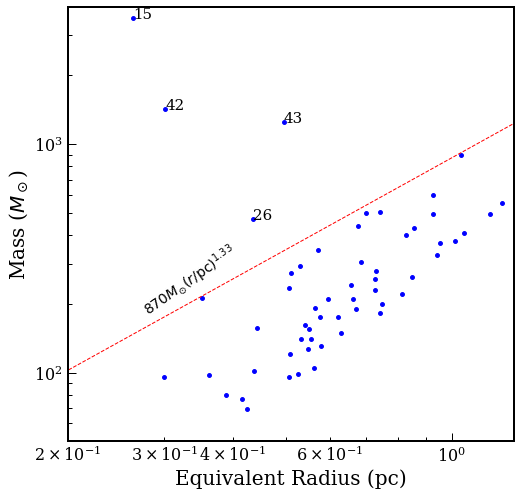

In [15]:
fig = plt.figure(1, figsize = (8,8))
ax1 = fig.add_subplot(111)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(0.2,1.3)
ax1.set_ylim(50,4000)
x = np.logspace(np.log10(0.002), np.log10(30), 1000)
y = 870.0*x**1.33
ax1.plot(x,y,'r--',zorder = 1, linewidth = 1)
"""for i in range(len(sedlist)):
    if (sedlist["Ma"][i]/sedlist['mass'][i])<=2:       
        ax1.scatter(sedlist['r_pc'][i],sedlist['mass'][i], marker = '.',s=60,  
                    color = 'blue')
    else:
        ax1.scatter(sedlist['r_pc'][i],sedlist['mass'][i], marker = '.',s=60, 
                    color = 'red')
"""
#ax1.errorbar(sedlist['r_pc'], sedlist['mass'], yerr=sedlist['error_mass'],fmt='.b',ecolor='b')
ax1.set_xlabel(r'Equivalent Radius (pc)',fontsize=20)
ax1.set_ylabel('Mass ($M_\odot$)',fontsize=20)
ax1.text(0.27, 180, '$870 M_{\odot}(r / \mathrm{pc})^{1.33}$', size = 14, rotation = 35)
for i in range(len(sedlist)):
    ax1.scatter(sedlist['r_pc'][i],sedlist['mass'][i], marker = '.',s=60,  
                    color = 'blue')
    if sedlist['mass'][i]/(870*sedlist['r_pc'][i]**1.33) > 1:
        ax1.annotate(i+1,xy = (sedlist['r_pc'][i],sedlist['mass'][i]),size=15)
        
fig.savefig('relationMR.eps', papertype='a2',
                bbox_inches='tight')
fig.savefig('relationMR.pdf', papertype='a2',
                bbox_inches='tight')